In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.preprocessing import PowerTransformer

## Models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [312]:
df = pd.read_csv('Datasets/clean_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10683 non-null  object 
 1   Source          10683 non-null  object 
 2   Destination     10683 non-null  object 
 3   Duration        10683 non-null  int64  
 4   Total_Stops     10683 non-null  float64
 5   Price           10683 non-null  int64  
 6   Date_Journey    10683 non-null  int64  
 7   Month_Journey   10683 non-null  int64  
 8   Year_Journey    10683 non-null  int64  
 9   Arrival_hour    10683 non-null  int64  
 10  Arrival_min     10683 non-null  int64  
 11  Departure_hour  10683 non-null  int64  
 12  Departure_min   10683 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [313]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_Journey,Month_Journey,Year_Journey,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,170,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1.0,13302,1,3,2019,21,35,16,50


In [314]:
X = df.drop(columns = ['Price'])
y = df['Price']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


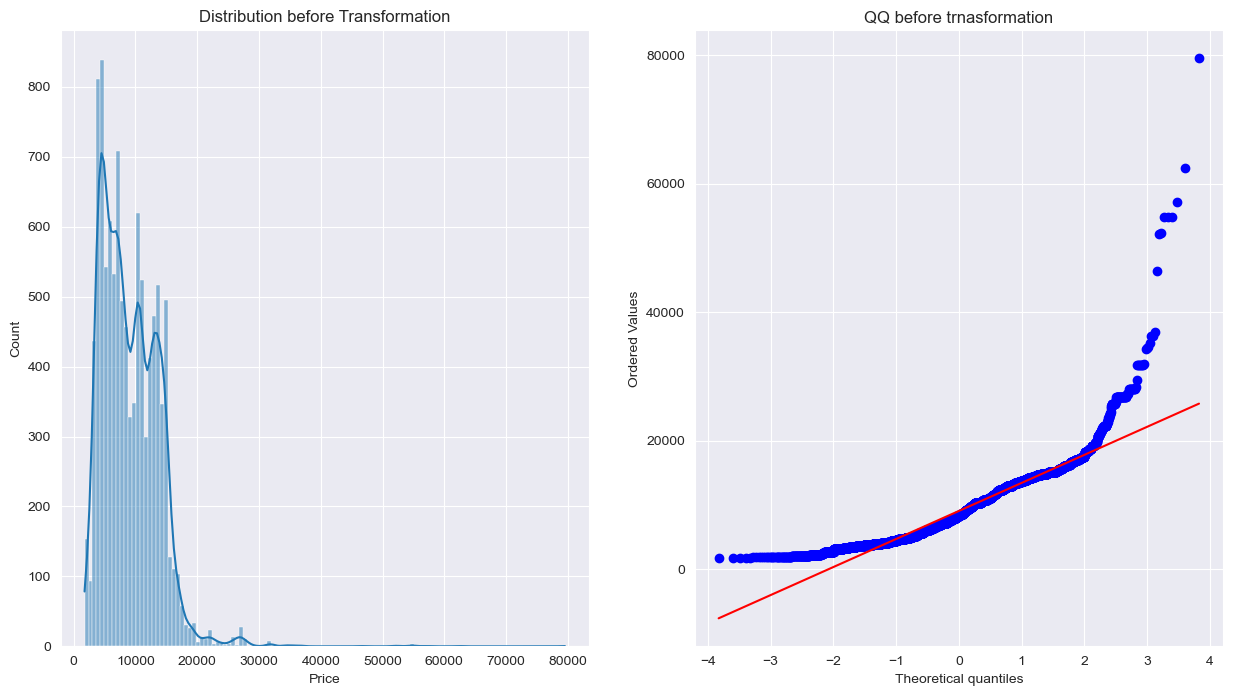

In [315]:
plt.figure(figsize = (15,8))
plt.subplot(121)
sns.histplot(x = y, kde = True )
plt.title("Distribution before Transformation")
plt.subplot(122)
stats.probplot(x = y, dist = 'norm', plot = plt)
plt.title("QQ before trnasformation")
plt.show()

In [316]:
power_transform = PowerTransformer(method = "yeo-johnson")
y = power_transform.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y.flatten(), name='Price')

In [317]:
num_col = [ i for i in X.select_dtypes(include = ['number'])]
cat_col = [i for i in X.select_dtypes(include = ['object'])]
print(f"Categorical Columns = {cat_col}")
print(f"Numerical Columns = {num_col}")

Categorical Columns = ['Airline', 'Source', 'Destination']
Numerical Columns = ['Duration', 'Total_Stops', 'Date_Journey', 'Month_Journey', 'Year_Journey', 'Arrival_hour', 'Arrival_min', 'Departure_hour', 'Departure_min']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


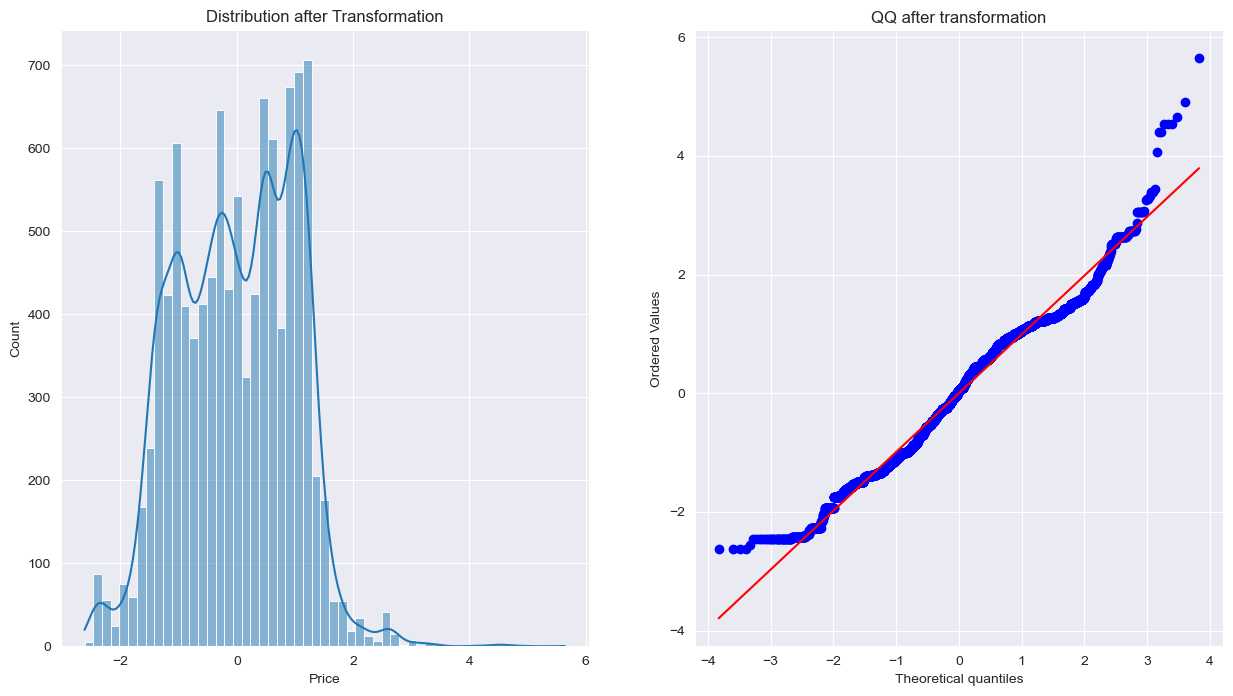

In [318]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
sns.histplot(x=y, kde=True)
plt.title("Distribution after Transformation")
plt.subplot(122)
stats.probplot(x=y, dist='norm', plot=plt)
plt.title("QQ after transformation")
plt.show()

In [319]:
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size =0.2, random_state=32)

In [320]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8546, 12)
(8546,)
(2137, 12)
(2137,)


In [321]:
numeric_pipeline = Pipeline([
    ('scaler',StandardScaler())
])

In [322]:
categorical_pipeline = Pipeline([
    ('Ohe', OneHotEncoder())
])

In [323]:
preprocessor = ColumnTransformer([
    ('numerical_pipeline', numeric_pipeline, num_col),
    ('categorical_pipeline',categorical_pipeline, cat_col )
])

In [324]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [325]:
X_train

array([[ 0.0215547 ,  0.25986001,  1.60450852, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.77374594,  0.25986001, -1.47593711, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.90171496,  1.74432772, -0.52810769, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.64577692,  1.74432772, -0.17267165, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43125876,  0.25986001,  0.53820042, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.66546446,  0.25986001,  0.18276438, ...,  0.        ,
         0.        ,  1.        ]])

In [326]:
y_train

4916     0.926723
9937     0.322263
7581     0.631030
6635     1.321007
4709    -0.794508
           ...   
7571    -0.937493
10328   -1.223820
4030     1.151251
9526     0.559486
9771    -0.309382
Name: Price, Length: 8546, dtype: float64

## Model Selection Phase

In [331]:
models = [
    ('linear_regression' , LinearRegression()),
    ('Ridge_regression' , Ridge()),
    ('lasso_regression' , Lasso()),
    ('Decision_tree' , DecisionTreeRegressor()),
    ('KNN' , KNeighborsRegressor())
]


In [333]:
for name, model in models:
    try:
        scores = cross_val_score(model, X=X_train, y=y_train, cv=5, scoring='r2')
        print(f"{name} score is: {scores}")
    except Exception as e:
        print(f"Error processing model '{name}': {e}")

linear_regression score is: [ 6.94894073e-01 -1.00953542e+22  6.90930431e-01  7.19804544e-01
  7.03603164e-01]
Ridge_regression score is: [0.69427171 0.71555149 0.70674542 0.71925512 0.70507863]
lasso_regression score is: [-1.03441807e-03 -1.99345203e-03 -1.43322980e-03 -2.34893157e-03
 -1.84019634e-07]
Decision_tree score is: [0.7958738  0.75561356 0.768134   0.79540083 0.79760326]
KNN score is: [0.81171025 0.81119836 0.8208519  0.83462713 0.82498763]
